# 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('diabetes.csv')
df.dropna(inplace=True)
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [23]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [19]:
fig,ax = plt.subplots(3,3,figsize=(15, 10))
k = 0
for i in range(3):
    for j in range(3):
        sns.distplot(df.iloc[:,k], kde=False, fit=stats.gamma, ax=ax[i,j])
        k += 1

In [2]:
# Glucose BloodPressure SkinThickness Insulin BMI
df.loc[df['Glucose']==0.0,'Glucose'] = df['Glucose'].mean()
df.loc[df['BloodPressure']==0.0,'BloodPressure'] = df['BloodPressure'].mean()
df.loc[df['SkinThickness']==0.0,'SkinThickness'] = df['SkinThickness'].mean()
df.loc[df['Insulin']==0.0,'Insulin'] = df['Insulin'].mean()
df.loc[df['BMI']==0.0,'BMI'] = df['BMI'].mean()

In [47]:
df.describe()

Pregnancies     Glucose  BloodPressure  ...  DiabetesPedigreeFunction         Age     Outcome
count   768.000000  768.000000     768.000000  ...                768.000000  768.000000  768.000000
mean      3.845052  121.681605      72.254807  ...                  0.471876   33.240885    0.348958
std       3.369578   30.436016      12.115932  ...                  0.331329   11.760232    0.476951
min       0.000000   44.000000      24.000000  ...                  0.078000   21.000000    0.000000
25%       1.000000   99.750000      64.000000  ...                  0.243750   24.000000    0.000000
50%       3.000000  117.000000      72.000000  ...                  0.372500   29.000000    0.000000
75%       6.000000  140.250000      80.000000  ...                  0.626250   41.000000    1.000000
max      17.000000  199.000000     122.000000  ...                  2.420000   81.000000    1.000000

[8 rows x 9 columns]

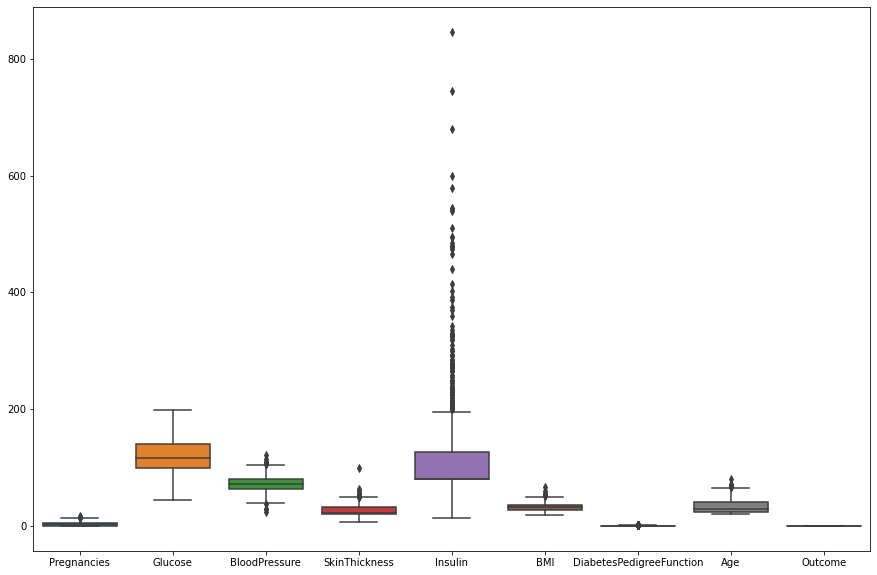

In [48]:
fig,ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df[df.columns.to_numpy().tolist()],ax=ax)

In [3]:
names = ['BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for name in names:
    percentile25 = df[name].quantile(0.25)
    percentile75 = df[name].quantile(0.75)
    print(name+'_percentile25: %.1f,'%(percentile25)+name+'_percentile75: %.1f'%(percentile75))
    iqr = percentile75 - percentile25
    upper_BP = percentile75 + 1.5 * iqr
    lower_BP = percentile25 - 1.5 * iqr
    print(name+'_upper_BP: %.1f,'%(upper_BP)+name+'_lower_BP: %.1f'%(lower_BP))
    df[name] = np.where(df[name]>upper_BP, upper_BP, df[name])
    df[name] = np.where(df[name]<lower_BP, lower_BP, df[name])

BloodPressure_percentile25: 64.0,BloodPressure_percentile75: 80.0
BloodPressure_upper_BP: 104.0,BloodPressure_lower_BP: 40.0
SkinThickness_percentile25: 20.5,SkinThickness_percentile75: 32.0
SkinThickness_upper_BP: 49.2,SkinThickness_lower_BP: 3.3
Insulin_percentile25: 79.8,Insulin_percentile75: 127.2
Insulin_upper_BP: 198.4,Insulin_lower_BP: 8.6
BMI_percentile25: 27.5,BMI_percentile75: 36.6
BMI_upper_BP: 50.2,BMI_lower_BP: 13.8
DiabetesPedigreeFunction_percentile25: 0.2,DiabetesPedigreeFunction_percentile75: 0.6
DiabetesPedigreeFunction_upper_BP: 1.2,DiabetesPedigreeFunction_lower_BP: -0.3
Age_percentile25: 24.0,Age_percentile75: 41.0
Age_upper_BP: 66.5,Age_lower_BP: -1.5


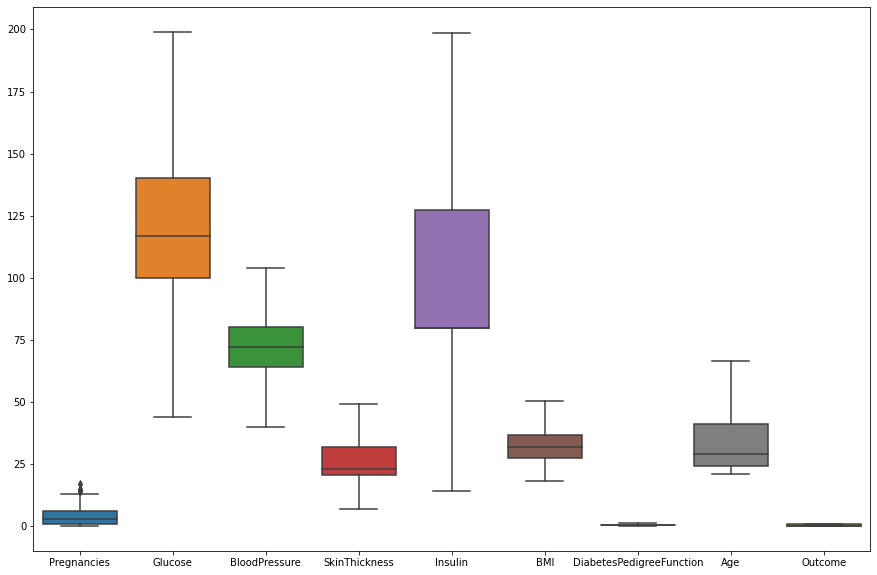

In [4]:
fig,ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df[df.columns.to_numpy().tolist()],ax=ax)

In [55]:
df.describe()

Pregnancies     Glucose  BloodPressure  ...  DiabetesPedigreeFunction         Age     Outcome
count   768.000000  768.000000     768.000000  ...                768.000000  768.000000  768.000000
mean      3.845052  121.681605      72.226161  ...                  0.458914   33.199870    0.348958
std       3.369578   30.436016      11.716722  ...                  0.285596   11.628404    0.476951
min       0.000000   44.000000      40.000000  ...                  0.078000   21.000000    0.000000
25%       1.000000   99.750000      64.000000  ...                  0.243750   24.000000    0.000000
50%       3.000000  117.000000      72.000000  ...                  0.372500   29.000000    0.000000
75%       6.000000  140.250000      80.000000  ...                  0.626250   41.000000    1.000000
max      17.000000  199.000000     104.000000  ...                  1.200000   66.500000    1.000000

[8 rows x 9 columns]

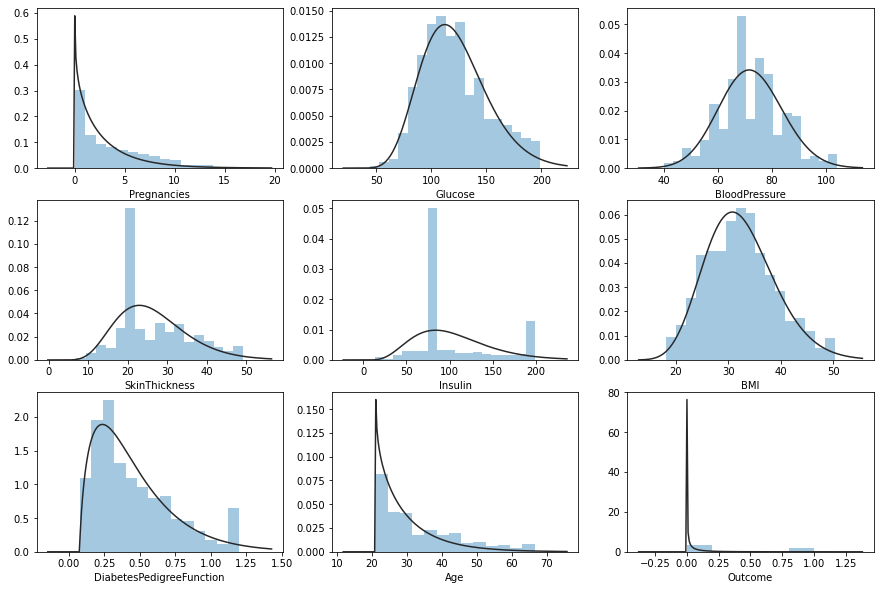

In [56]:
fig,ax = plt.subplots(3,3,figsize=(15, 10))
k = 0
for i in range(3):
    for j in range(3):
        sns.distplot(df.iloc[:,k], kde=False, fit=stats.gamma, ax=ax[i,j])
        k += 1

# 2

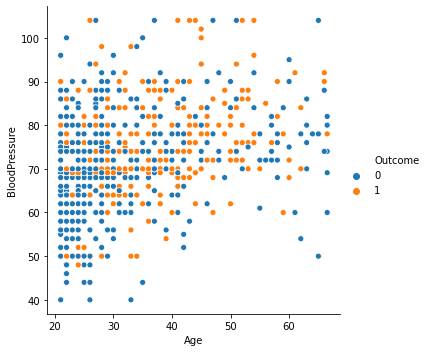

In [5]:
# Visualization
sns.relplot(x="Age",y="BloodPressure",hue="Outcome", data=df, ax=ax)

In [5]:
# Research question: What are the effects of age and bloodpressure on diabetes?
# Hypothesis: H0:there is no difference between the mean of bloodpressure for women with diabetes and healthy women 
# Ha:there is difference between the mean of bloodpressure for women with diabetes and healthy women 


# BloodPressure
def t_2samp(list_c1,list_c2):
    lst1,lst2=list_c1.copy(),list_c2.copy()
    n1,n2=len(lst1),len(lst2)
    sig_homovar=stats.levene(lst1,lst2)[1]
    var1,var2=np.var(lst1)*n1/(n1-1),np.var(lst2)*n2/(n2-1)
    var12=((n1-1)*var1+(n2-1)*var2)/(n1+n2-2)
    t_homo=(np.mean(lst1)-np.mean(lst2))/(var12*(1/n1+1/n2))**0.5
    df_homo=n1+n2-2
    sig_homo=2*stats.t.sf(abs(t_homo),df_homo)
    t_nothomo=(np.mean(lst1)-np.mean(lst2))/(var1/n1+var2/n2)**0.5
    df_nothomo=(var1/n1+var2/n2)**2/((var1/n1)**2/n1+(var2/n2)**2/n2)
    sig_nothomo=2*stats.t.sf(abs(t_nothomo),df_nothomo)
    df_res=pd.DataFrame(index=['equal variance','unequal variance'],columns=['significance','t value','freedom','Sig.'])
    df_res['significance']=[sig_homovar,'-']
    df_res['t value']=[t_homo,t_nothomo]
    df_res['freedom']=[df_homo,df_nothomo]
    df_res['Sig.']=[sig_homo,sig_nothomo]
    return df_res

group1=df.loc[df['Outcome']==1, 'BloodPressure']
group2=df.loc[df['Outcome']==0, 'BloodPressure']
print(len(group1),len(group2))

t_2samp(group1.to_numpy().tolist(),group2.to_numpy().tolist())

268 500


significance   t value     freedom      Sig.
equal variance       0.956964  4.662758  766.000000  0.000004
unequal variance            -  4.655308  545.425707  0.000004

In [7]:
fig,ax = plt.subplots(figsize=(5, 5))
sns.distplot(group1, kde=False, fit=stats.gamma, ax=ax)
sns.distplot(group2, kde=False, fit=stats.gamma, ax=ax)

In [8]:
# Age
group1=df.loc[df['Outcome']==1, 'Age']
group2=df.loc[df['Outcome']==0, 'Age']
t_2samp(group1.to_numpy().tolist(),group2.to_numpy().tolist())

significance   t value     freedom          Sig.
equal variance       0.112956  6.924215  766.000000  9.284605e-12
unequal variance            -  7.028028  571.600267  5.988180e-12

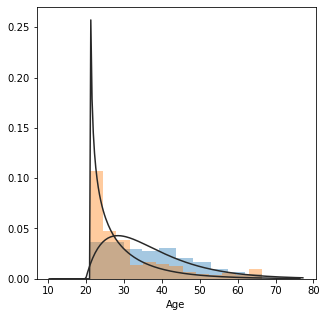

In [9]:
fig,ax = plt.subplots(figsize=(5, 5))
sns.distplot(group1, kde=False, fit=stats.gamma, ax=ax)
sns.distplot(group2, kde=False, fit=stats.gamma, ax=ax)

In [58]:
sns.pairplot(df)

In [61]:
corr = df.corr(method='spearman')
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,annot=True,cbar_kws={'label':'heatmap'},ax=ax)
# Pregnancies have large ralation with Age, and SkinThickness have also large relation with BMI

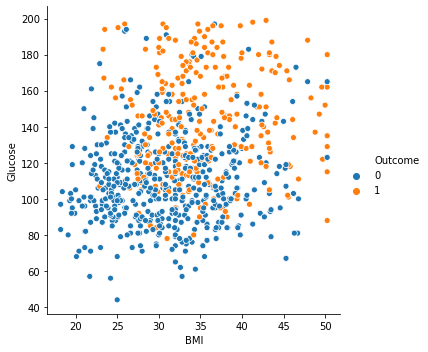

In [6]:
# Research question: What are the effects of BMI and glucose on diabetes?
# Hypothesis: H0:there is no difference between means of bloodpressure for women with diabetes and healthy women 
# Ha:there is difference between means of bloodpressure for women with diabetes and healthy women 


sns.relplot(x="BMI",y="Glucose",hue="Outcome", data=df, ax=ax)

In [28]:
#Glucose

group1=df.loc[df['Outcome']==1, 'Glucose']
group2=df.loc[df['Outcome']==0, 'Glucose']
print(len(group1),len(group2))

t_2samp(group1.to_numpy().tolist(),group2.to_numpy().tolist())

268 500


significance    t value     freedom          Sig.
equal variance    1.42459e-06  15.679090  766.000000  2.937418e-48
unequal variance            -  14.862435  471.199136  2.990499e-41

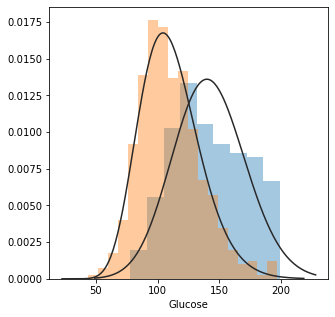

In [29]:
fig,ax = plt.subplots(figsize=(5, 5))
sns.distplot(group1, kde=False, fit=stats.gamma, ax=ax)
sns.distplot(group2, kde=False, fit=stats.gamma, ax=ax)

In [30]:
#BMI

group1=df.loc[df['Outcome']==1, 'BMI']
group2=df.loc[df['Outcome']==0, 'BMI']
print(len(group1),len(group2))

t_2samp(group1.to_numpy().tolist(),group2.to_numpy().tolist())

268 500


significance   t value     freedom          Sig.
equal variance      0.0978136  9.122259  766.000000  6.379239e-19
unequal variance            -  9.255391  570.964603  4.259117e-19

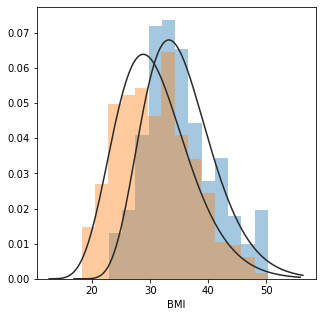

In [31]:
fig,ax = plt.subplots(figsize=(5, 5))
sns.distplot(group1, kde=False, fit=stats.gamma, ax=ax)
sns.distplot(group2, kde=False, fit=stats.gamma, ax=ax)

# 3

In [5]:
tmp_df = df[['Glucose','BMI','Outcome']]
tmp_df.describe()

Glucose         BMI     Outcome
count  768.000000  768.000000  768.000000
mean   121.681605   32.388956    0.348958
std     30.436016    6.667633    0.476951
min     44.000000   18.200000    0.000000
25%     99.750000   27.500000    0.000000
50%    117.000000   32.000000    0.000000
75%    140.250000   36.600000    1.000000
max    199.000000   50.250000    1.000000

In [6]:
tmp_df.head(20)

Glucose        BMI  Outcome
0     148.0  33.600000        1
1      85.0  26.600000        0
2     183.0  23.300000        1
3      89.0  28.100000        0
4     137.0  43.100000        1
5     116.0  25.600000        0
6      78.0  31.000000        1
7     115.0  35.300000        0
8     197.0  30.500000        1
9     125.0  31.992578        1
10    110.0  37.600000        0
11    168.0  38.000000        1
12    139.0  27.100000        0
13    189.0  30.100000        1
14    166.0  25.800000        1
15    100.0  30.000000        1
16    118.0  45.800000        1
17    107.0  29.600000        1
18    103.0  43.300000        0
19    115.0  34.600000        1

In [7]:
new_df = tmp_df.copy()
new_df.loc[tmp_df['Glucose']<140.0,'Glucose'] = 'low'
new_df.loc[tmp_df['Glucose']>=140.0,'Glucose'] = 'high'
J

new_df.loc[tmp_df['BMI']<18.5,'BMI'] = 'thin'
new_df.loc[(tmp_df['BMI']>=18.5) & (tmp_df['BMI']<24.9),'BMI'] = 'normal'
new_df.loc[tmp_df['BMI']>=25.0,'BMI'] = 'fat'

new_df.head(20)

Glucose     BMI  Outcome
0     high     fat        1
1      low     fat        0
2     high  normal        1
3      low     fat        0
4      low     fat        1
5      low     fat        0
6      low     fat        1
7      low     fat        0
8     high     fat        1
9      low     fat        1
10     low     fat        0
11    high     fat        1
12     low     fat        0
13    high     fat        1
14    high     fat        1
15     low     fat        1
16     low     fat        1
17     low     fat        1
18     low     fat        0
19     low     fat        1

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Outcome ~ C(Glucose) + C(BMI) + C(Glucose):C(BMI)', data=new_df).fit()
sm.stats.anova_lm(model)


df      sum_sq    mean_sq           F        PR(>F)
C(Glucose)           1.0   29.970841  29.970841  164.572789  3.000725e-34
C(BMI)               3.0    5.737556   1.912519   10.501826  8.958453e-07
C(Glucose):C(BMI)    3.0    0.504510   0.168170    0.923438  4.289438e-01
Residual           762.0  138.770092   0.182113         NaN           NaN

In [9]:
print(model.params)

Intercept                             3.349180e-01
C(Glucose)[T.low]                    -3.349180e-01
C(BMI)[T.fat]                         3.640067e-01
C(BMI)[T.normal]                      1.196274e-01
C(BMI)[T.thin]                        6.500433e-16
C(Glucose)[T.low]:C(BMI)[T.fat]      -8.879664e-02
C(Glucose)[T.low]:C(BMI)[T.normal]   -9.740522e-02
C(Glucose)[T.low]:C(BMI)[T.thin]      6.751186e-16
dtype: float64


In [10]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     39.22
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           6.82e-36
Time:                        10:38:30   Log-Likelihood:                -432.73
No. Observations:                 768   AIC:                             877.5
Df Residuals:                     762   BIC:                             905.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte